In [2]:
import os, uproot

base = '/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM'
files = os.listdir(base)
for file in files:
    fname = f"{base}/{file}/ntuple.root"
    f = uproot.open(fname)
    t = f['sixBtree']
    if ak.all(t['bSFshape_central'].array() == 1): print(f"{fname}\n{t['bSFshape_central'].array()}")

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-400_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-800_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


KeyInFileError: not found: 'bSFshape_central'

    Available keys: 'HX_eta', 'H1_eta', 'H2_eta', 'X_eta', 'Y_eta', 'jet_eta', 'Event', 'lhe_ht', 'PFHT', 'gen_X_eta', 'gen_Y_eta', 'HX_b1_eta', 'HX_b2_eta', 'H1_b1_eta', 'H1_b2_eta', 'H2_b1_eta', 'H2_b2_eta', 'n_ele', 'n_jet'...

in file /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1300_MY-1000_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
in object /sixBtree;1

In [11]:
def f(x, mu=125, sigma1=25, sigma2=75):
    sigma = np.repeat(sigma2, len(x))
    sigma = np.where(x < mu, sigma1, sigma)
    return np.exp(-0.5*(x-mu)**2/sigma**2)

In [15]:
x = np.linspace(0,300,1000)
y = f(x)
rank = 1-y

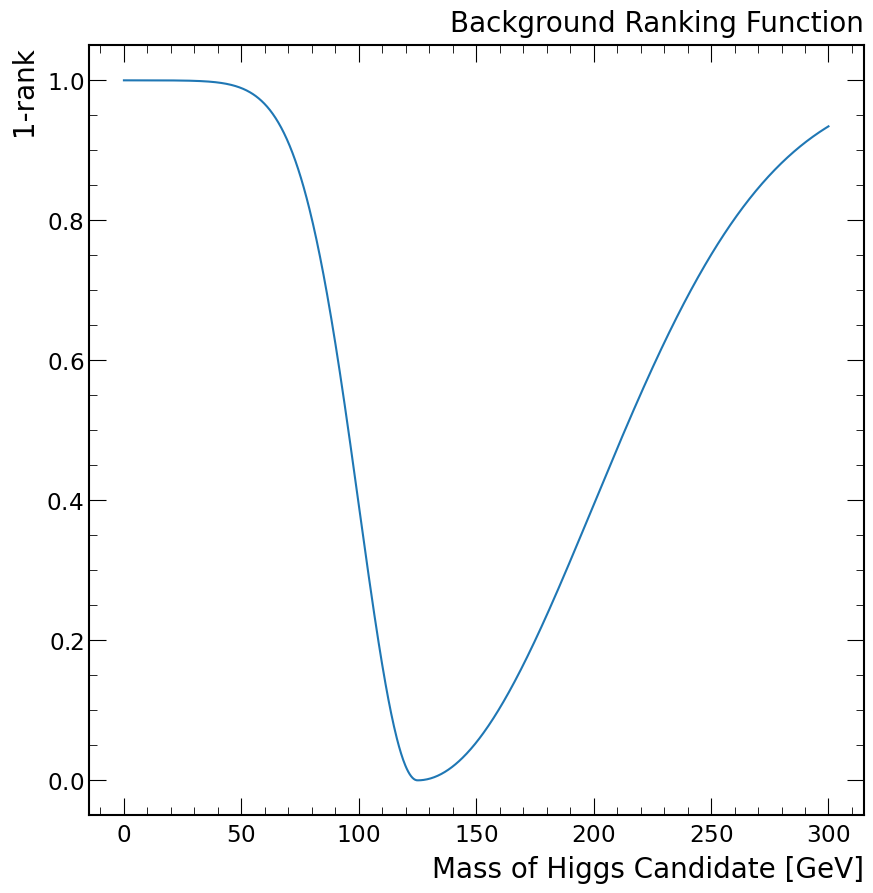

In [26]:
fig, ax = plt.subplots()

ax.plot(x, rank)
# ax.plot([125,125], [0,1], color='gray', linestyle='--')

ax.set_title('Background Ranking Function')
ax.set_ylabel('1-rank')
ax.set_xlabel('Mass of Higgs Candidate [GeV]')

fig.savefig('plots/feynnet/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/bkg_ranking.pdf', bbox_inches='tight')

In [17]:
import uproot
from tqdm import tqdm

In [ ]:
def getMinMax(fname):
    f = uproot.open(fname)
    e = f['Events']
    runs = e['run'].array()
    return int(min(runs)), int(max(runs))

In [45]:
with open("/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/MultiHiggs/analysis/MultiHAnalysis/input/Run2_UL/RunIISummer20UL18NanoAODv9/JetHT_Run2018D.txt", "r") as fi:
    lines = fi.readlines()
    lines = [line.strip('\n') for line in lines]
    print(len(lines))

232


In [46]:
rmin, rmax = np.array(()), np.array(())
for line in tqdm(lines):
    tmin, tmax = getMinMax(line)
    rmin = np.append(rmin, tmin)
    rmax = np.append(rmax, tmax)
print(f"{int(rmin.min())}-{int(rmax.max())}")

  0%|          | 0/232 [00:00<?, ?it/s]

100%|██████████| 232/232 [44:19<00:00, 11.47s/it]

320500-325175


In [9]:
import uproot
f = uproot.open("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8/ntuple.root")
t = f["sixBtree"]
ak.any(t['jet_hadronFlav'].array() == 4, axis=1)

<Array [False, False, False, ..., False, False, False] type='52797 * bool'>